## Titanic DataSet

### Inporting the DataSet

### 1) Problem Definition 
**Summary:**
The dataset I have chosen to work on is the Titanic Dataset. <u> Using this dataset, I am going to predict the survival of the passengers after the clash of the Titanic ship.</u> This dataset has 12 columns and 891 rows in which many are missing. Moreover, the dataset has a combination of Categorical values which need to be converted to numeric and Numerical data with vast differences which need to be scaled for good predictions. In order to address all these issues, I am going to firstly remove unnecessary columns and fill in the missing values of strings with mode and numbers with mean of the respective columns. Later, I am going to scale the data using the MinMaxScaler. After the Data Preprocessing, I am going to apply Decision Tree Classifier as my machine learning model, report feature importance, and improve my results by considering dropping least important features as well as applying other machine learning models as well.

In [48]:
import pandas as pd
import numpy as np
df = pd.read_csv("Titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2) Data Cleaning and Preprocessing

### Dropping Unnecessary Columns

In [49]:
df = df.drop(columns = ["PassengerId", "Ticket"])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Removing rows that are completely empty

In [50]:
is_na = []
is_na.extend(df.isnull().apply(lambda x:all(x), axis = 1))
    

for index,ele in enumerate(is_na):
    if ele:
        df.drop(index, axis=0, inplace = True)
        
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


### Check for missing values and replace them

In [51]:
# Checking for missing values
total = df.isnull().sum().sort_values(ascending=False)
total

Cabin       687
Age         177
Embarked      2
Fare          0
Parch         0
SibSp         0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

In [52]:
'''
Here we see that Cabin, Age, and Embarked have missing values that should be replaced 
with an imputed value. Cabin needs to be replaced once we extract features that can be 
converted into numeric. This step can be done a little further.
'''

#Age has 177 missing values which can be computed based on the mean age value
from sklearn.impute import SimpleImputer
age_imputer = SimpleImputer(missing_values = np.nan, strategy = "mean")
df.Age = age_imputer.fit_transform(df[["Age"]])

#Enmbarked has only 2 missing values so it can be replced with mode
from_where1 = {"S" : 0, "C": 1, "Q":2}
df["Embarked"] = df["Embarked"].map(from_where1)
embarked_imputer = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")
df.Embarked = embarked_imputer.fit_transform(df[["Embarked"]])

In [53]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,0.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,1.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,0.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,0.0
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,0.0


### Checking and changing the data types

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       891 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    float64
dtypes: float64(3), int64(4), object(3)
memory usage: 69.7+ KB


In [55]:
df["Fare"] = df["Fare"].round().astype(int)
df["Age"] = df["Age"].round().astype(int)
df["Embarked"] = df["Embarked"].astype(int)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Name      891 non-null    object
 3   Sex       891 non-null    object
 4   Age       891 non-null    int32 
 5   SibSp     891 non-null    int64 
 6   Parch     891 non-null    int64 
 7   Fare      891 non-null    int32 
 8   Cabin     204 non-null    object
 9   Embarked  891 non-null    int32 
dtypes: int32(3), int64(4), object(3)
memory usage: 59.3+ KB


In [57]:
total = df.isnull().sum().sort_values(ascending=False)
total

Cabin       687
Embarked      0
Fare          0
Parch         0
SibSp         0
Age           0
Sex           0
Name          0
Pclass        0
Survived      0
dtype: int64

### Feature Extraction

In [58]:
'''
In order to train the model, all strings should be converted into numeric types. In this 
dataset, the column "sex", "name", and "cabin" should be changed into numeric

'''

#Sex Column
from_where2 = {"male" : 0, "female": 1}
df["Sex"] = df["Sex"].map(from_where2)
df["Sex"] = df["Sex"].astype(int)

#Cabin Column
cabin = df["Cabin"].copy()
first = []

for i,j in enumerate(cabin):
    if pd.isna(j):
        first.append(-1)
    else:
        first.append(cabin[i][0])

for i,j in enumerate(first):
    if j == 'A':
        cabin[i] = 1
    elif j == 'B':
        cabin[i] = 2
    elif j == 'C':
        cabin[i] = 3
    elif j == 'D':
        cabin[i] = 4
    elif j == 'E':
        cabin[i] = 5
    elif j == 'F':
        cabin[i] = 6
    elif j == 'G':
        cabin[i] = 7
    elif j == 'U':
        cabin[i] = 8
    else:
        cabin[i] = 0

df["Cabin"] = cabin
df["Cabin"] = df["Cabin"].astype(int)
df.head()

#name column
df["Name"] = df["Name"].replace(["Mlle", "Ms", "Mme"] , ["Miss", "Miss", "Mrs"], regex = True)
df1 = df.to_dict()
df = pd.DataFrame(df1)
df["Name"] = df["Name"].fillna(-1)
names = df["Name"]
new_names = []
    
for i in names:
    if i != -1:
        last,first = i.strip().split(",")
        title = first.strip().split(".")
        if title[0] == "Mr":
            new_names.append(1)
        elif title[0] == "Miss":
            new_names.append(2)
        elif title[0] == "Mrs":
            new_names.append(3)
        elif title[0] == "Master":
            new_names.append(4)
        elif title[0] == "Rare":
            new_names.append(5)
        else:
            new_names.append(0)
    else:
        new_names.append(0)
            
df["Name"] = new_names

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Name      891 non-null    int64
 3   Sex       891 non-null    int64
 4   Age       891 non-null    int64
 5   SibSp     891 non-null    int64
 6   Parch     891 non-null    int64
 7   Fare      891 non-null    int64
 8   Cabin     891 non-null    int64
 9   Embarked  891 non-null    int64
dtypes: int64(10)
memory usage: 76.6 KB


In [60]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,0,22,1,0,7,0,0
1,1,1,3,1,38,1,0,71,3,1
2,1,3,2,1,26,0,0,8,0,0
3,1,1,3,1,35,1,0,53,3,0
4,0,3,1,0,35,0,0,8,0,0


### Feature Scaling

In [61]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df.iloc[:, 1:] = scaler.fit_transform(df.iloc[:, 1:])
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1.0,0.25,0.0,0.2750,0.125,0.0,0.013672,0.000000,0.0
1,1,0.0,0.75,1.0,0.4750,0.125,0.0,0.138672,0.428571,0.5
2,1,1.0,0.50,1.0,0.3250,0.000,0.0,0.015625,0.000000,0.0
3,1,0.0,0.75,1.0,0.4375,0.125,0.0,0.103516,0.428571,0.0
4,0,1.0,0.25,0.0,0.4375,0.000,0.0,0.015625,0.000000,0.0


### Data Splitting

In [62]:
features = df.iloc[:, 1:]
response = df.iloc[:, 0]

In [63]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.2, random_state = 0)

### Model Selection, Model Fitting, Model Evaluation

### Training the Model
#### Decision Tree Classifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier(random_state = 0)
decision_classifier.fit(features_train, response_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [65]:
decision_response_pred = decision_classifier.predict(features_test)

In [66]:
from sklearn.metrics import accuracy_score
decision_score = accuracy_score(response_test, decision_response_pred)
decision_score

0.7988826815642458

### Reporting Feature Importance

In [67]:
### Choosing my model for feature importance
importance = decision_classifier.feature_importances_
feature_names = features.columns
df_dict = list(zip(feature_names, importance))
importance_df = pd.DataFrame(df_dict, columns=["Feature Names", "Score"])
importance_df

,Feature Names,Score
0,Pclass,0.129362
1,Name,0.355338
2,Sex,0.003710
3,Age,0.222528
4,SibSp,0.032238
5,Parch,0.036348
6,Fare,0.158902
7,Cabin,0.033508
8,Embarked,0.028067


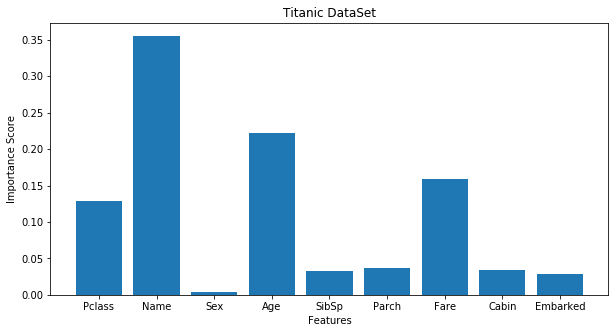

In [68]:
from matplotlib import pyplot
pyplot.figure(figsize=(10, 5))
pyplot.bar(x = list(range(len(importance))), height = importance, tick_label = feature_names)
pyplot.title('Titanic DataSet')
pyplot.xlabel('Features')
pyplot.ylabel('Importance Score')
pyplot.show()

### Improving my results

In [69]:
df_clean = df.copy()
df_clean = df_clean.drop(columns=["Sex"])

In [70]:
response = df_clean[["Survived"]]
features = df_clean.iloc[:, 1:]

In [71]:
from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.2, random_state = 0)

In [72]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier = DecisionTreeClassifier(random_state = 0)
decision_classifier.fit(features_train, response_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [73]:
decision_response_pred = decision_classifier.predict(features_test)

In [74]:
from sklearn.metrics import accuracy_score
decision_score = accuracy_score(response_test, decision_response_pred)
decision_score

0.8044692737430168

The model's accuracy has increased by dropping the most least important feature.
However, there might be different models that can yield better results compared to 
Decision Tree Classifier.

### Improving my results by applying different models and checking for the accuracy score

In [75]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1.0,0.25,0.0,0.2750,0.125,0.0,0.013672,0.000000,0.0
1,1,0.0,0.75,1.0,0.4750,0.125,0.0,0.138672,0.428571,0.5
2,1,1.0,0.50,1.0,0.3250,0.000,0.0,0.015625,0.000000,0.0
3,1,0.0,0.75,1.0,0.4375,0.125,0.0,0.103516,0.428571,0.0
4,0,1.0,0.25,0.0,0.4375,0.000,0.0,0.015625,0.000000,0.0


In [76]:
features = df.iloc[:, 1:]
response = df.iloc[:, 0]

from sklearn.model_selection import train_test_split
features_train, features_test, response_train, response_test = train_test_split(features, response, test_size = 0.2, random_state = 0)

### Logistic Regression Classification

In [77]:
from sklearn.linear_model import LogisticRegression
logistic_classifier = LogisticRegression(random_state = 0)
logistic_classifier.fit(features_train, response_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [78]:
logistic_response_pred = logistic_classifier.predict(features_test)

In [79]:
from sklearn.metrics import accuracy_score
logistic_score = accuracy_score(response_test, logistic_response_pred)
logistic_score

0.8324022346368715

### K-Nearest Neighbors

In [80]:
from sklearn.neighbors import KNeighborsClassifier
k_classifier = KNeighborsClassifier(n_neighbors = 3)
k_classifier.fit(features_train, response_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [81]:
k_response_pred = k_classifier.predict(features_test)

In [82]:
from sklearn.metrics import accuracy_score
k_score = accuracy_score(response_test, k_response_pred)
k_score

0.8268156424581006

### Random Forest Classification

In [83]:
from sklearn.ensemble import RandomForestClassifier
random_classifier = RandomForestClassifier(n_estimators = 150)
random_classifier.fit(features_train, response_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [84]:
random_response_pred = random_classifier.predict(features_test)

In [85]:
from sklearn.metrics import accuracy_score
random_score = accuracy_score(response_test, random_response_pred)
random_score

0.8268156424581006

### All Three models tend to have a better accuracy result compared to Decision Tree Classifier even after removing least important feature.